# Analiza zločina u Sjedinjenim Američkim Državama

"*Da je čovječanstvo odvajkada bilo razumno, historija ne bi bila dugačka hronika gluposti i zločina.*"
-> Arthur Schopenhauer

## Uvod

Zločini su nažalost normalna pojava današnjice i kao takvi su prisutni u svim nastanjenim područjima.

In [2]:
#tu cu importat sve sta ce mi trebat
import pandas as pd
import scipy as sc
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from IPython.display import display
#from IPython.html import widgets
from IPython.display import Image
from IPython.display import HTML
import folium
#from fbprophet import Prophet

U ovom radu koncentrirat ćemo se na zločine počinjene u Sjedinjenim Američkim Državama, točnije na nasilne (eng. *violent crime*) zločine i imovinske (eng.*property crime*) zločine te ćemo promatrati njihovu povezanost s razvijenošću.
Možda se pitate zašto upravo SAD? Odgovor je: zato što smo jako fokusirani na događanja na drugom kontinentu, a i zbog pretpostavke koju dobivamo iz medija da tamo postoji "ne mali" broj kriminalnih djela.

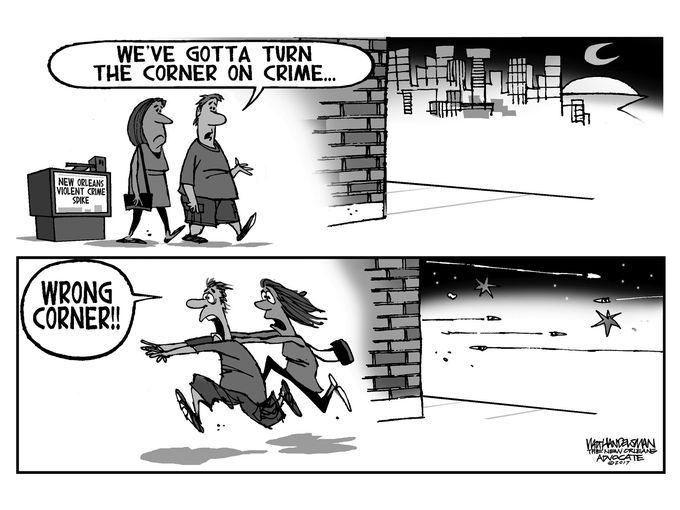

In [3]:
Image('img/crimeCartoon.jpg',width="500")

Ispitat ćemo povezanost stope nasilnih zločina (nasilni zločini,ubojstva,silovanja,..) i stope imovinskog kriminala(krađe,...) po 100 000 stanovnika s gospodarskom razvijenosću pojedine savezne države.
Još ćemo na kraju na temelju podataka o stopama zločina u vremenskom intervalu od 1995. do 2016. godine na razini cijelog SAD-a promatrati trend porasta/opadanja stopa navedenih kategorija zločina, procjeniti stope za 2017. godinu( i usporediti ih s pravim vrijednostima) te pokušati projecirati potencijalni broj stopa zločina za 2018. godinu.

In [4]:
map_osm = folium.Map(location=[48, -102])
map_osm

##  Prikupljanje podataka

Podaci o kriminalnim djelima preuzeti su s web stranice FBI: Uniform Crime Reporting koju možete naći na sljedećem linku: https://ucr.fbi.gov 

Korišteni su sljedeći podaci:

• Tablica 1 - podatak za stope zločina po 100 000 stanovnika na razini cijelog SAD-a u vremenskom intervalu od 1995. do 2016. godine. Ti podaci su spemljeni u datoteci *years.txt* . 

• Tablica 3 - podaci za zločine iz 2016. godine na razini saveznih država. Za svaku saveznu državu je izračunata stopa nasilnih zločina i stopa imovinskih zločina  po 100 000 stanovnika prema formuli:

$s = \frac{brojZlocina}{Populacija}*100 000$.

Također koristimo podatke o stopi BDP-a po stanovniku (izraženo u US dolarima) za 2016. godinu po saveznim državama te će nam taj podatak biti pokazatelj gospodarske razvijenosti pojedine savezne države.

Ti podaci su spremljeni u datoteci states.txt dok se sama Tablica 3 može pronaći u folderu data/.

## 1. Analiza stope BDP-a i stope zločina po saveznim državama za 2016. godinu 

U ovom dijelu koristimo podatke iz datoteke *states.txt* . Prikaz datoteke *states.txt* :

In [5]:
names = ['state','stopa_nasilnih_zlocina','stopa_imovinskih_zlocina','BDP']
datas = pd.read_csv('data/states.txt', delimiter='\t', names=names) 

#pretvorba brojcanih vrijednosti u float
stopa_nasilnih_zlocina1 = [float(v) for v in datas.stopa_nasilnih_zlocina]
datas['stopa_nasilnih_zlocina'] = stopa_nasilnih_zlocina1
stopa_imovinskih_zlocina1 = [float(v) for v in datas.stopa_imovinskih_zlocina]
datas['stopa_imovinskih_zlocina'] = stopa_imovinskih_zlocina1
BDP1 = [float(v) for v in datas.BDP]
datas['BDP'] = BDP1

state = np.asarray(datas.state)
stopa_nasilnih_zlocina = np.asarray(datas.stopa_nasilnih_zlocina)
stopa_imovinskih_zlocina = np.asarray(datas.stopa_imovinskih_zlocina)
BDP = np.asarray(datas.BDP)

datas.head(10)

,state,stopa_nasilnih_zlocina,stopa_imovinskih_zlocina,BDP
0,Alabama,532.3,2947.8,42124.0
1,Alaska,804.2,3353.0,58356.0
2,Arizona,470.1,2978.4,43709.0
3,Arkansas,550.9,3268.6,40388.0
4,California,445.3,2553.0,66310.0
5,Colorado,342.6,2740.7,58422.0
6,Connecticut,227.1,1808.0,73643.0
7,Delaware,508.8,2766.0,73931.0
8,Florida,430.3,2686.8,44964.0
9,Georgia,397.6,3004.5,50955.0


Radimo opisnu analizu podataka. Zadani podaci su stopa nasilnih zločina i stopa imovinskih zločina po saveznoj državi u 2016. godini te stopa BDP-a po stanovniku po saveznim državama izražena u US dolarima za 2016. godinu.
Navedene podatke zovemo uzorci, a označavamo ih s $x$.

### Korištene vrijednosti:

duljina uzorka:  $n$

minimum ($min$):  minimalna vrijednost koju poprima uzorak

maksimum ($max$):  minimalna vrijednost koju poprima uzorak 

aritmetička sredina ($\mu$):  $\mu=\frac{x_1+ \dots + x_1}{n}$ 

varijanca ($Var$):  $Var= \frac{\sum_{1}^{n} (x_i-\mu)^2}{n}$

standardna devijacija ($\sigma$):  $\sigma = \sqrt{Var}$


In [6]:
def kategorija(x):
    n, (minimum, maximum), mean, var, s, k = stats.describe(x)
    return np.array([mean, var, np.sqrt(var), minimum ,maximum])

ispis={ '': pd.Series(np.array([r'$\mu$', '$Var$', r'$\sigma$', '$min$' ,'$max$'])),
        'stopa_nasilnih_zlocina': pd.Series(kategorija(stopa_nasilnih_zlocina)),
        'stopa_imovinskih_zlocina': pd.Series(kategorija(stopa_imovinskih_zlocina)),
        'BDP': pd.Series(kategorija(BDP))
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,BDP,stopa_imovinskih_zlocina,stopa_nasilnih_zlocina
,,,
$\mu$,5.438468e+04,2458.088000,378.038000
$Var$,9.516702e+07,354302.748833,21195.942812
$\sigma$,9.755359e+03,595.233357,145.588265
$min$,3.602900e+04,1512.900000,123.800000
$max$,7.536000e+04,3937.100000,804.200000


### Histogrami

Histogramom ćemo pomoću relativnih frekvencija naslutiti distibuciju uzorka te ćemo nacrtati i normalnu funkciju gustoće za uzorak (crvena iscrtana linija) kako bi mogli predvidjeti je li distribucija normalna.

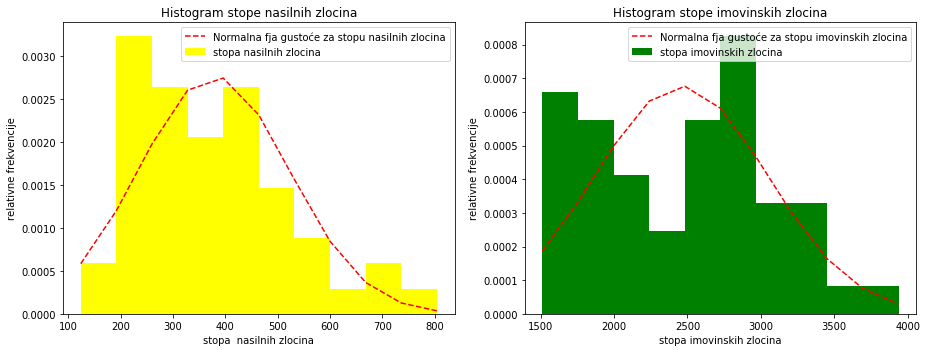

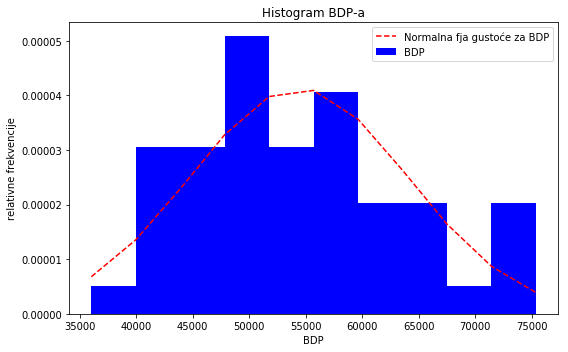

In [8]:
fig, axes = plt.subplots(1,2,figsize=(13, 5))

n, bins, patches = axes[0].hist(stopa_nasilnih_zlocina, normed=1, facecolor='yellow', alpha=1, label="stopa nasilnih zlocina")
y = mlab.normpdf(bins, stopa_nasilnih_zlocina.mean(), np.sqrt(stopa_nasilnih_zlocina.var()))
axes[0].plot(bins, y, 'r--', label=u'Normalna fja gustoće za stopu nasilnih zlocina')
axes[0].set_xlabel('stopa  nasilnih zlocina')
axes[0].set_ylabel('relativne frekvencije')
axes[0].set_title('Histogram stope nasilnih zlocina');

n, bins, patches = axes[1].hist(stopa_imovinskih_zlocina, normed=1, facecolor='green', alpha=1, label="stopa imovinskih zlocina")
y = mlab.normpdf(bins, stopa_imovinskih_zlocina.mean(), np.sqrt(stopa_imovinskih_zlocina.var()))
axes[1].plot(bins, y, 'r--', label=u'Normalna fja gustoće za stopu imovinskih zlocina')
axes[1].set_xlabel('stopa imovinskih zlocina')
axes[1].set_ylabel('relativne frekvencije')
axes[1].set_title('Histogram stope imovinskih zlocina');

axes[0].legend()
axes[1].legend()
fig.tight_layout();

fig,ax = plt.subplots(1,1,figsize=(8, 5))
n, bins, patches = ax.hist(BDP, normed=1, facecolor='blue', alpha=1, label="BDP")
y = mlab.normpdf(bins, BDP.mean(), np.sqrt(BDP.var()))
ax.plot(bins, y, 'r--', label=u'Normalna fja gustoće za BDP')
ax.set_xlabel('BDP')
ax.set_ylabel('relativne frekvencije')
ax.set_title('Histogram BDP-a');

ax.legend()
fig.tight_layout();

### Boxplot

Neka je $x=(x_1, \dots , x_n)$ uzorak. U našem slučaju su to stopa BDP-a i stopa zlocina. 
Neka je $x_{(1)}, \dots , x_{(n)}$ sortirani uzorak.
Neka su $q_L$ donji kvartil uzorka, $q_U$ gornji kvartil uzorka. Inerkvartil se definira kao $IQR=q_U-q_L$.
Karakteristična petorka uzorka je $(x_{(1)}, q_L, m, q_U, x_{(n)})$ .
Kružići označavaju sve točke izvan tih granica i smatraju se outlierima.

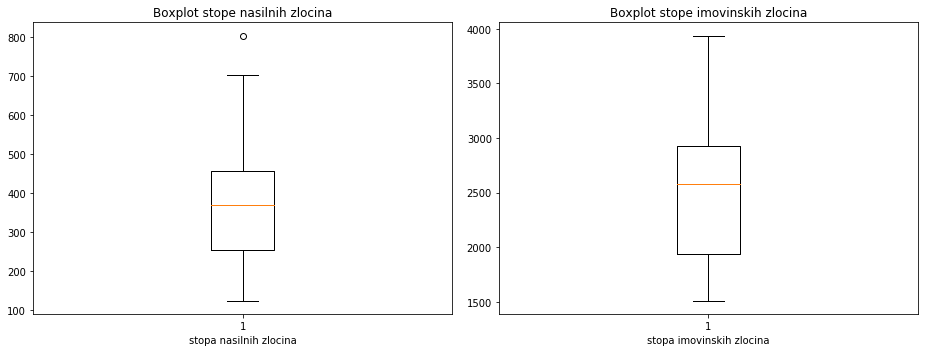

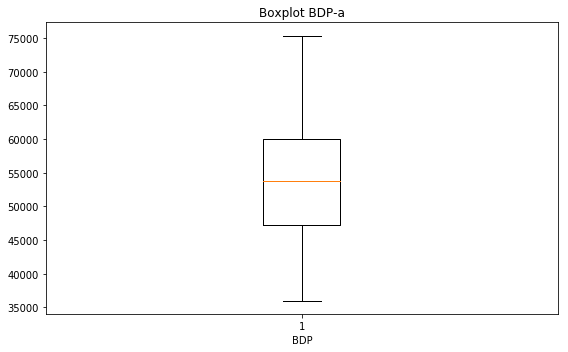

In [9]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
axes[0].boxplot(stopa_nasilnih_zlocina)
axes[0].set_xlabel('stopa nasilnih zlocina')
axes[0].set_title(r'Boxplot stope nasilnih zlocina');
axes[1].boxplot(stopa_imovinskih_zlocina)
axes[1].set_xlabel('stopa imovinskih zlocina')
axes[1].set_title(r'Boxplot stope imovinskih zlocina');
fig.tight_layout();

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.boxplot(BDP)
ax.set_xlabel('BDP')
ax.set_title(r'Boxplot BDP-a');
fig.tight_layout();

### Ispitivanje normalnosti uzorka

Želimo ispitati jesu li stope BDP-a po stanovniku i stope nasilnih/imovinskih zlocina, svaki u oznaci $ Y = (Y_{(1)}, \dots , Y_{(n)}) $, normalno distribuirani.

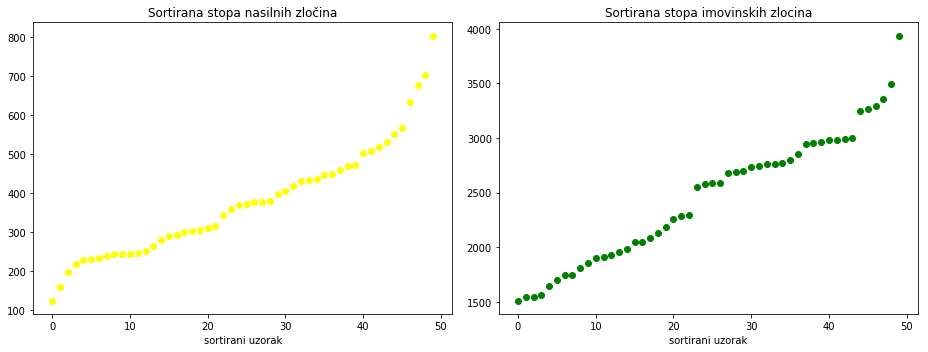

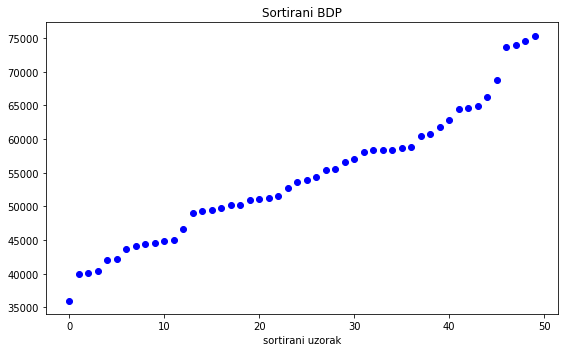

In [10]:
n=np.arange(0,len(BDP))
fig, axes=plt.subplots(1,2, figsize=(13,5))
axes[0].scatter(n, np.sort(stopa_nasilnih_zlocina), c='yellow') 
axes[0].set_xlabel('sortirani uzorak')
axes[0].set_title(r'Sortirana stopa nasilnih zločina');
axes[1].scatter(n, np.sort(stopa_imovinskih_zlocina), c='green')
axes[1].set_xlabel('sortirani uzorak')
axes[1].set_title(r'Sortirana stopa imovinskih zlocina');
fig.tight_layout();

n=np.arange(0,len(BDP))
fig, ax=plt.subplots(1,1, figsize=(8,5))
ax.scatter(n, np.sort(BDP), c='blue') 
ax.set_xlabel('sortirani uzorak')
ax.set_title(r'Sortirani BDP');
fig.tight_layout();

### Normalni vjerojatnosni graf

Neka je $ y_{(1)}, \dots , y_{(n)} $ uređena realizacija slučajunog uzorka $ Y_{(1)}, \dots , Y_{(n)} $. Pomoću funkcije distribucije jedinične normalne razdiobe $ \Phi $, definiramo brojeve $ x_i = \Phi^{-1} \left( \frac{i-3/8}{n+1/4} \right) $, $ i=1, \dots , n $.
Tada u Kartezijevom koordinatnom sustavu prikažemo parove točaka $ (x_i, y_{(i)}) $.
Ako je $ Y_{(1)}, \dots , Y_{(n)} $ slučajni uzorak iz normalnog modela $N(\mu, \sigma^2)$, onda u normalnom vjerojatnosnom grafu točke $ (x_i, y_{(i)}) $ moraju biti aproksimativno na pravcu $ y= \mu +\sigma x $.

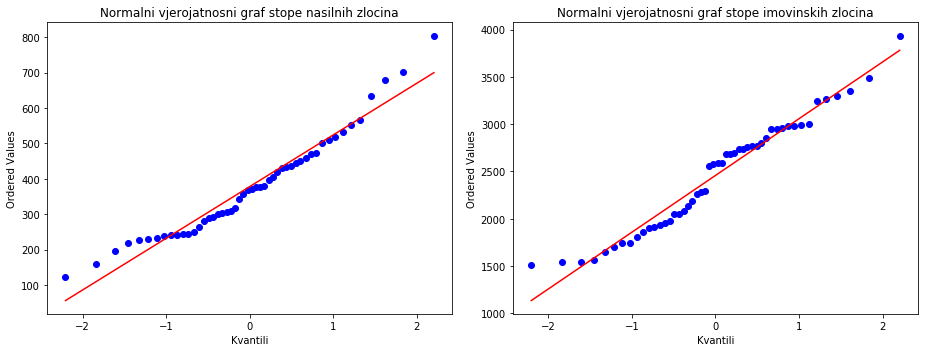

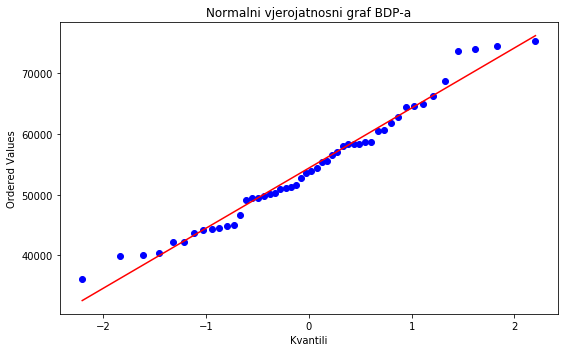

In [11]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
y=sc.stats.probplot(stopa_nasilnih_zlocina, plot=axes[0])
y=sc.stats.probplot(stopa_imovinskih_zlocina, plot=axes[1])
axes[0].set_xlabel('Kvantili')
axes[0].set_title('Normalni vjerojatnosni graf stope nasilnih zlocina');
axes[1].set_xlabel('Kvantili')
axes[1].set_title('Normalni vjerojatnosni graf stope imovinskih zlocina');
fig.tight_layout();

fig, ax = plt.subplots(1,1, figsize=(8,5))
y=sc.stats.probplot(BDP, plot=ax)
ax.set_xlabel('Kvantili')
ax.set_title('Normalni vjerojatnosni graf BDP-a');
fig.tight_layout();

Iz opisne statistike pretpostaviti da stopa BDP-a ima normalnu distribuciju, dok za stope zlocina ne može tvrditi sa grafova.

## Statistički testovi

### Test normalnosti 

Provodimo test normalnosti za ispitivanje normalnosti distribucije podataka. Na razini značajnosti $\alpha=0.05$ testiramo hipoteze:
\begin{equation*}
\begin{aligned}
&H_0: \, X \sim N(\mu, \sigma^2) \\ &H_1: \, ne \, H_0
\end{aligned}
\end{equation*}

In [12]:
def normalnost (x):
    k,pv = stats.normaltest(x)
    return np.array(pv)
       
ispis={ '': pd.Series(np.array(['p-vrijednost testa normalnosti'])),
        'BDP': pd.Series([normalnost(BDP)]),
        'stopa nasilnih zlocina': pd.Series([normalnost(stopa_nasilnih_zlocina)]),
        'stopa imovinskih zlocina': pd.Series([normalnost(stopa_imovinskih_zlocina)])
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,BDP,stopa imovinskih zlocina,stopa nasilnih zlocina
,,,
p-vrijednost testa normalnosti,0.45742848491822785,0.3205038099886211,0.04959190890835031


Vidimo da je za stope BDP-a i stope imovinskih zločina p-vrijednost $p>\alpha$, što znači da ne možemo odbaciti hipotezu $H_0$ u korist $H_1$ na razini značajnosti od $\alpha=0.05$, iz čega slijedi da su te stope normalno distribuirane.
Stopa nasilnih zločina ima p-vrijednost $p<\alpha$, što znači da možemo odbaciti hipotezu $H_0$ u korist $H_1$ na razini značajnosti od $\alpha=0.05$, iz čega slijedi da ta stopa nema normalnu distribuciju.

### $\chi^2$ - test nezavisnosti

Provjeravamo jesu li stope BDP-a po stanovniku i stope nasilnih/imovinskih zlocina nezavisna statistička obilježja.
 
Stopu BDP-a dijelimo u tri kategorije, Savezne države s visokim BDP-om su one čiji BDP po stanovniku iznosi više od $65 000 $USD. Savezne države sa srednjim BDP-om su one čiji BDP po stanovniku iznosi između $45 000$ i $65 000$ USD. Savezne države sa niskim BDP-om su one čiji BDP po stanovniku iznosi manje od $45 000$ USD. 

Stopu nasilnih zločina dijelimo u tri kategorije, visoka: $>450$, srednja: između $350 - 450$ i niska: $<350$ .

Stopu imovinskih zločina dijelimo u tri kategorije, visoka: $>3200$, srednja: između $2000 - 3200$ i niska: $<2000$ .

In [13]:
#dijelimo podatke u kategorije
#prefiks n označava nasilni,a prefiks i označava imovinski u varijablama
nvisok = datas.BDP[datas.stopa_nasilnih_zlocina >= 450]
nsrednji = datas.BDP[datas.stopa_nasilnih_zlocina < 450][datas.stopa_nasilnih_zlocina > 350]
nnizak = datas.BDP[datas.stopa_nasilnih_zlocina <= 350]

ivisok = datas.BDP[datas.stopa_imovinskih_zlocina >= 3000]
isrednji = datas.BDP[datas.stopa_imovinskih_zlocina < 3000][datas.stopa_imovinskih_zlocina > 2000]
inizak = datas.BDP[datas.stopa_imovinskih_zlocina <= 2000]

nvisok, ivisok = [0,0,0], [0,0,0]
nsrednji, isrednji = [0,0,0], [0,0,0]
nnizak, inizak = [0,0,0], [0,0,0]
lista=[45000,60000]

nvisok[0] = len(datas.BDP[datas.stopa_nasilnih_zlocina >= 450][datas.BDP <= lista[0]])
nsrednji[0] = len(datas.BDP[datas.stopa_nasilnih_zlocina < 450][datas.stopa_nasilnih_zlocina > 350][datas.BDP <= lista[0]])
nnizak[0] = len(datas.BDP[datas.stopa_nasilnih_zlocina <= 350][datas.BDP <= lista[0]])

ivisok[0] = len(datas.BDP[datas.stopa_imovinskih_zlocina >= 3000][datas.BDP <= lista[0]])
isrednji[0] = len(datas.BDP[datas.stopa_imovinskih_zlocina < 3000][datas.stopa_imovinskih_zlocina > 2000][datas.BDP <= lista[0]])
inizak[0] = len(datas.BDP[datas.stopa_imovinskih_zlocina <= 2000][datas.BDP <= lista[0]])

for i in range (1,2):
    nvisok[i] = len(datas.BDP[datas.stopa_nasilnih_zlocina >= 450][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    nsrednji[i] = len(datas.BDP[datas.stopa_nasilnih_zlocina < 450][datas.stopa_nasilnih_zlocina > 350][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    nnizak[i] = len(datas.BDP[datas.stopa_nasilnih_zlocina <= 350][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    ivisok[i] = len(datas.BDP[datas.stopa_imovinskih_zlocina >= 3000][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    isrednji[i] = len(datas.BDP[datas.stopa_imovinskih_zlocina < 3000][datas.stopa_imovinskih_zlocina > 2000][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    inizak[i] = len(datas.BDP[datas.stopa_imovinskih_zlocina <= 2000][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    
nvisok[2] = len(datas.BDP[datas.stopa_nasilnih_zlocina >= 450][datas.BDP >= lista[1]])
nsrednji[2] = len(datas.BDP[datas.stopa_nasilnih_zlocina < 450][datas.stopa_nasilnih_zlocina > 350][datas.BDP >= lista[1]])
nnizak[2] = len(datas.BDP[datas.stopa_nasilnih_zlocina <= 350][datas.BDP >= lista[1]]) 

ivisok[2] = len(datas.BDP[datas.stopa_imovinskih_zlocina >= 3000][datas.BDP <= lista[1]])
isrednji[2] = len(datas.BDP[datas.stopa_imovinskih_zlocina < 3000][datas.stopa_imovinskih_zlocina > 2000][datas.BDP <= lista[1]])
inizak[2] = len(datas.BDP[datas.stopa_imovinskih_zlocina <= 2000][datas.BDP <= lista[1]])

#nvisok, nsrednji, nnizak
ivisok, isrednji, inizak

([3, 3, 6], [7, 14, 21], [2, 8, 10])

In [14]:
nz = np.array([nvisok, nsrednji, nnizak])
print ('Očekivane frekvencije za stopu nasilnih zlocina i BDP-a po stanovniku:')
print (sc.stats.contingency.expected_freq(nz))
print ('\n')
print ('Očekivane frekvencije za stopu imovinskih zlocina i BDP-a po stanovniku:')
iz = np.array([ivisok, isrednji, inizak])
print (sc.stats.contingency.expected_freq(iz))

Očekivane frekvencije za stopu nasilnih zlocina i BDP-a po stanovniku:
[[ 3.12  6.5   3.38]
 [ 3.36  7.    3.64]
 [ 5.52 11.5   5.98]]


Očekivane frekvencije za stopu imovinskih zlocina i BDP-a po stanovniku:
[[ 1.94594595  4.05405405  6.        ]
 [ 6.81081081 14.18918919 21.        ]
 [ 3.24324324  6.75675676 10.        ]]


$\chi^2$ testom na razini značajnosti od $\alpha=0.05$ testiramo hipoteze
\begin{equation*}
\begin{aligned}
&H_0: \text{navedena obilježja su nezavisna} \\ &H_1: \, ne \, H_0
\end{aligned}
\end{equation*}
uz testnu statistiku $ H=\sum_{i=1}^{3} \sum_{j=1}^{3} \frac{(N_{ij}-n_{ij})^2}{n_{ij}} \sim \chi^2(df), df=(3-1)(3-1)=4 $


In [15]:
chi2tnz, pvnz, dfnz, expectednz = sc.stats.chi2_contingency(nz)
sstr = 'Testna statistika za nezavisnost BDP-a i stope nasilnih zločina = %6.4f, p-vrijednost = %6.4f, stupnjevi slobode = %6.4f '
print (sstr %( chi2tnz, pvnz, dfnz))
print ('\n')

chi2tiz, pviz, dfiz, expectediz = sc.stats.chi2_contingency(iz)
sstr = 'Testna statistika za nezavisnost BDP-a i stope imovinskih zločina = %6.4f, p-vrijednost = %6.4f, stupnjevi slobode = %6.4f '
print (sstr %( chi2tiz, pviz, dfiz))

Testna statistika za nezavisnost BDP-a i stope nasilnih zločina = 2.4232, p-vrijednost = 0.6584, stupnjevi slobode = 4.0000 


Testna statistika za nezavisnost BDP-a i stope imovinskih zločina = 1.5581, p-vrijednost = 0.8163, stupnjevi slobode = 4.0000 


Kako je p-vrijednost , $p>\alpha$ , tada na razini značajnosti od 5% ne možemo odbaciti hipotezu $H_0$ u korist $H_1$ .

### Testovi korelacije 

### Pearsonov koeficijent korelacije

Pošto su stope BDP-a i stope imovisnkih zločina normalno distibuirani onda koristimo Pearsonov koeficijent korelacije.

In [16]:
koef, pv = sc.stats.pearsonr(stopa_imovinskih_zlocina, BDP)
sstr = 'Pearsonov koeficijent za BDP i stopu imovinskih zločina: %6.4f, p-vrijednost: %6.4f '
print (sstr % (koef, pv))

Pearsonov koeficijent za BDP i stopu imovinskih zločina: -0.3442, p-vrijednost: 0.0144 


Dakle,zbog $p<\alpha$, postoji slaba negativna korelacija između stope BDP-a i stope imovinskih zločina.

### Spearmanov koeficijent korelacije

Pošto za stopu nasilnih zločina ne možemo reći da dolazi iz normalne distribucije onda koristimo Spearmanov koeficijent korelacije.

Spearmanov koeficijent za BDP i stope nasilnih zločina: -0.1965, p-vrijednost: 0.1713 


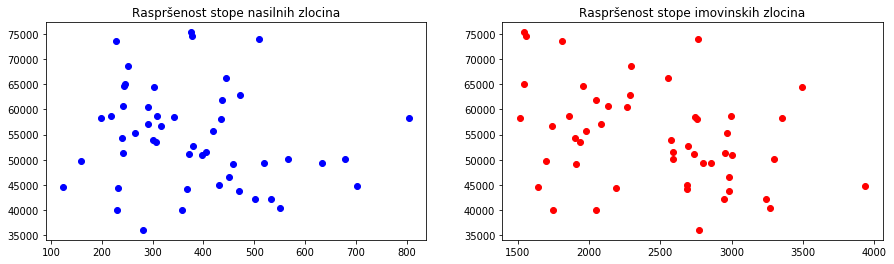

In [17]:
koefnz, pvnz = sc.stats.spearmanr(BDP, stopa_nasilnih_zlocina)
sstr = 'Spearmanov koeficijent za BDP i stope nasilnih zločina: %6.4f, p-vrijednost: %6.4f '
print (sstr % (koefnz, pvnz))

fig, axes=plt.subplots(1,2, figsize=(15,4))
axes[0].scatter(stopa_nasilnih_zlocina, BDP, c='blue')
axes[1].scatter(stopa_imovinskih_zlocina, BDP, c='red')
axes[0].set_title(u'Raspršenost stope nasilnih zlocina')
axes[1].set_title(u'Raspršenost stope imovinskih zlocina')
axes[1].axis('tight')
axes[0].axis('tight');

Uočimo kako zbog raspršenosti i $p>\alpha$,ne možemo ništa zaključiti iz Spearmanovog koeficijenta. Zbog toga koristimo Kendalov koeficijent korelacije.

### Kendalov koeficijent korelacije

Kendalov koeficijent korelacije $\tau$ određuje jačinu veze dvaju diskretnih statističkih obilježja u odnosu na rangove njihove vrijednosti. Kendalov koeficijent korelacije dobijemo tako da najprije vrijednostima obilježja $X$ i $Y$ dodijelimo rangove. Zatim promatramo parove rangova u uzorku za dvodimenzionalno obilježje $(X,Y)$. Označimo sa $C$ broj inverzija među tim parovima, te neka je $D$ broj onih parova koji nisu u inverziji. Tada je Kendalllov koeficijent korelacije jednak
 $$\tau=\frac{C-D}{C+D}$$

In [18]:
datas.corr(method='kendall')

,stopa_nasilnih_zlocina,stopa_imovinskih_zlocina,BDP
stopa_nasilnih_zlocina,1.000000,0.444898,-0.137959
stopa_imovinskih_zlocina,0.444898,1.000000,-0.222857
BDP,-0.137959,-0.222857,1.000000


Primjećujemo da i ovom metodom dobivamo skoro nikakvu povezanost stope BDP-a i stope nasilnih zločina .

### Zaključak

Zaključujemo da su stope BDP-a i imovinskih zločina normalno distribuirane, dok za stope nasilnih zločina ne možemo donijeti taj zaključak, iako su ti podaci jako blizu normalnoj distribuciji.

Testovima nezavisnosti nismo uspjeli dokazati postoji li povezanost između razvijenosti savezne države (stopa BDP-a) i stopa nasilnih i imovinskih zločina u tim saveznim državama.
Ipak smo uspjeli pokazati da postoji slaba korelacija između razvijenosti savezne države i stope imovinskih zločina u toj saveznoj državi te je procijenjeno da je koeficijent korelacije između tih obilježja negativan. Dakle, uspjeli smo pokazati da postoji slabi odnos između porasta BDP-a i smanjenja imovinskih zločina.
S druge strane, nismo našli odnos (ili je on jako mali) između razvijenosti i stope nasilnih zločina.

Drugim riječima, razvijene savezne države ne moraju nužno imati manju stopu nasilnih zločina, ali će ipak u nekoj mjeri imati manju stopu imovinskih zločina.

## 2. Analiza stope zločina od 1995. do 2016. godine na razini cijelog SAD-a

U ovom dijelu koristimo podatke iz datoteke *years.txt* .

Prikaz datoteke *years.txt* :

In [19]:
names = ['godina','stopa_nasilnih_zlocina','stopa_imovinskih_zlocina']
datac = pd.read_csv('data/years.txt', delimiter='\t', names=names) #datac-sadrzi zlocine po godinama

#pretvorba brojcanih vrijednosti u float i int
godina1 = [int(v) for v in datac.godina]
datac['godina'] = godina1
stopa_nasilnih_zlocina1 = [float(v) for v in datac.stopa_nasilnih_zlocina]
datac['stopa_nasilnih_zlocina'] = stopa_nasilnih_zlocina1
stopa_imovinskih_zlocina1 = [float(v) for v in datac.stopa_imovinskih_zlocina]
datac['stopa_imovinskih_zlocina'] = stopa_imovinskih_zlocina1

godina = np.asarray(datac.godina)
stopa_nasilnih_zlocina = np.asarray(datac.stopa_nasilnih_zlocina)
stopa_imovinskih_zlocina = np.asarray(datac.stopa_imovinskih_zlocina)

datac.head(10)

,godina,stopa_nasilnih_zlocina,stopa_imovinskih_zlocina
0,1995,684.5,4590.5
1,1996,636.6,4451.0
2,1997,611.0,4316.3
3,1998,567.6,4052.5
4,1999,523.0,3743.6
5,2000,506.5,3618.3
6,2001,504.5,3658.1
7,2002,494.6,3624.1
8,2003,475.8,3588.4
9,2004,463.2,3517.1


## Statistički testovi

### Shapiro-Wilk test normalnosti

Na razini značajnosti $\alpha=0.05$ testiramo hipoteze:
\begin{equation*}
\begin{aligned}
&H_0: \, X \sim N(\mu, \sigma^2) \\ &H_1: \, ne \, H_0
\end{aligned}
\end{equation*}

In [20]:
def Shapiro(x):
    t, pv = sc.stats.shapiro(x)
    return np.array(pv)
   
    
ispis={ '': pd.Series(np.array([ 'p-vrijednost S-W testa'])),
        'stopa nasilnih zločina': pd.Series([Shapiro(stopa_nasilnih_zlocina)]),
        'stopa imovinskih zločina': pd.Series([Shapiro(stopa_imovinskih_zlocina)]),
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,stopa imovinskih zločina,stopa nasilnih zločina
,,
p-vrijednost S-W testa,0.5405778884887695,0.0760517418384552


Uočimo da za oba podatka vrijedi $p>\alpha$ pa ne možemo odbaciti hipotezu $H_0$, iz čega slijedi da su podaci normalno distribuirani.

### Pouzdani intervali

S obzirom da podaci dolaze iz normalne razdiobe, onda za njih možemo izračunati pouzdane intervale za očekivanje, varijancu i standardnu devijaciju za $\alpha=0.05$.
Znamo da za slučajan uzorak $X_1, \dots , X_n$, $n>30$, $\mu= E[X]$ i $\sigma^2=Var(X_1)$ vrijedi da je
\begin{equation*}
\begin{aligned}
&Z= \frac{\overline{X_n}-\mu}{\sigma} \sqrt{n} \sim AN(0,1) \\ 
&V= \frac{n-1}{\sigma^2} S_n^2 \sim \chi^2(n-1)
\end{aligned}
\end{equation*}
Gdje $S_n^2$ predstavlja uzoračku varijancu. Pouzdani interval za standardnu derivaciju se računa tako da se izvadi drugi korijen od varijance.

In [21]:
print ('Pouzdani intervali za:')
print ('\n')

def ispis_intervala(x,naziv):
    print ('stopu '+naziv+' zlocina')
    mean, var, sigma = sc.stats.bayes_mvs(x, alpha=0.95)
    sstr = 'mean:[ %6.4f, %6.4f ]'
    print (sstr %(mean[1][0], mean[1][1] ))
    sstr = 'varijanca:[ %6.4f, %6.4f ]'
    print (sstr %(var[1][0], var[1][1] ))
    sstr = 'standardna devijacija:[ %6.4f, %6.4f ]'
    print (sstr %(sigma[1][0], sigma[1][1] ))
    print ('\n')
    
ispis_intervala(stopa_nasilnih_zlocina, 'nasilnih')
ispis_intervala(stopa_imovinskih_zlocina, 'imovinskih')

Pouzdani intervali za:


stopu nasilnih zlocina
mean:[ 435.7149, 514.4578 ]
varijanca:[ 4667.3459, 16103.6499 ]
standardna devijacija:[ 68.3180, 126.9002 ]


stopu imovinskih zlocina
mean:[ 3114.2765, 3655.7689 ]
varijanca:[ 220714.7695, 761527.7409 ]
standardna devijacija:[ 469.8029, 872.6556 ]




### Linearna regresija

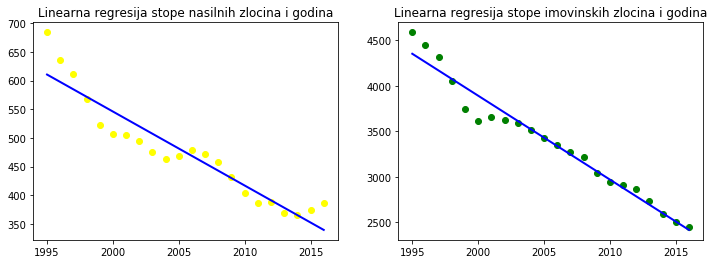

In [22]:
slope1, intercept1, r1, pv1, std_err1 = sc.stats.linregress(godina, stopa_nasilnih_zlocina)
slope2, intercept2, r2, pv2, std_err2 = sc.stats.linregress(godina, stopa_imovinskih_zlocina)

fig, axes=plt.subplots(1,2, figsize=(12,4))
axes[0].plot(godina,stopa_nasilnih_zlocina,'o', c='yellow')
axes[0].plot(godina, slope1*godina+intercept1, lw=2, c='blue' )
axes[0].set_title('Linearna regresija stope nasilnih zlocina i godina')

axes[1].plot(godina, stopa_imovinskih_zlocina, 'o', c='green')
axes[1].plot(godina, slope2*godina+intercept2, lw=2, c='blue' )
axes[1].set_title('Linearna regresija stope imovinskih zlocina i godina')

axes[1].axis('tight')
axes[0].axis('tight');

Uočimo da se može vidjeti trend opadanja obju stopa.